In [482]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [483]:
warnings.filterwarnings('ignore')

In [484]:
data = pd.read_csv("/content/ITC.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN


In [485]:
data.drop(['Date'], axis=1, inplace=True)

In [486]:
print(data.head())
print(data.shape)
print(data.columns)

  Symbol Series  Prev Close    Open    High    Low    Last   Close    VWAP  \
0    ITC     EQ      656.00  694.00  708.50  675.0  708.50  708.50  701.81   
1    ITC     EQ      708.50  714.00  729.00  694.3  710.65  712.35  714.16   
2    ITC     EQ      712.35  716.25  758.90  660.0  731.00  726.20  732.43   
3    ITC     EQ      726.20  741.00  784.30  741.0  784.30  784.30  776.63   
4    ITC     EQ      784.30  832.40  847.05  824.0  847.05  847.05  841.25   

    Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0   562715  3.949174e+13     NaN                 NaN          NaN  
1   712637  5.089379e+13     NaN                 NaN          NaN  
2  1382149  1.012325e+14     NaN                 NaN          NaN  
3   721618  5.604266e+13     NaN                 NaN          NaN  
4   231209  1.945046e+13     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turno

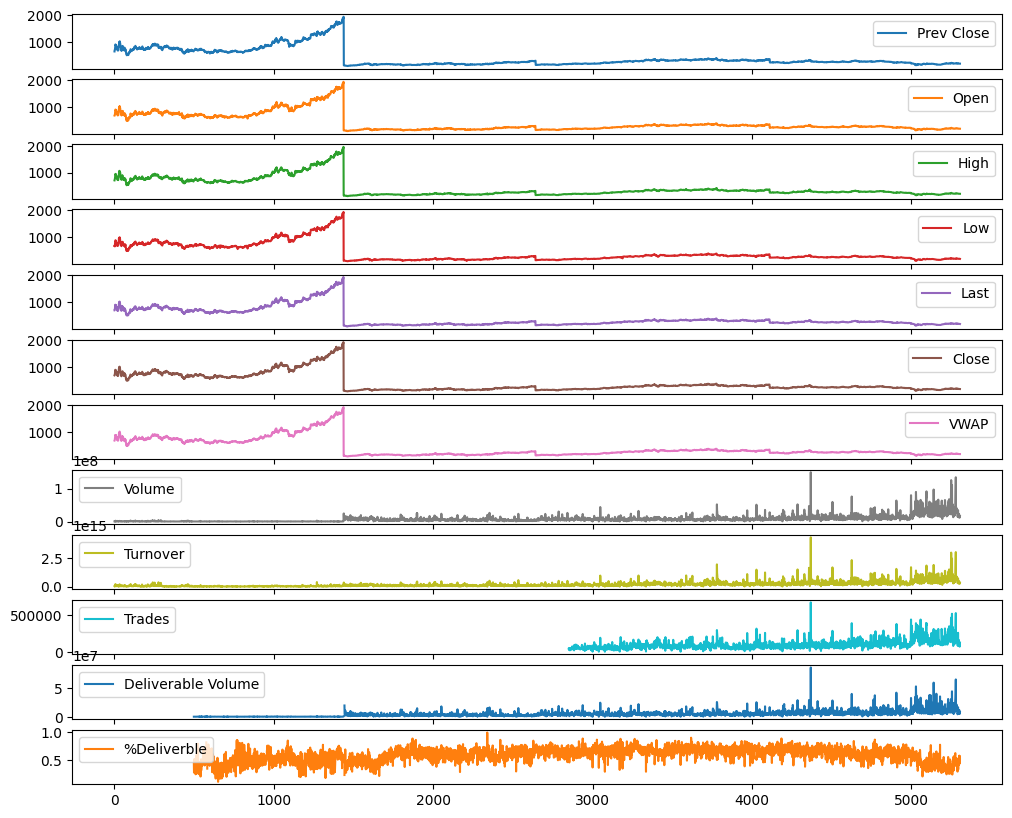

Symbol                   1
Series                   1
Prev Close            3906
Open                  3009
High                  3294
Low                   3434
Last                  3474
Close                 3905
VWAP                  4937
Volume                5305
Turnover              5306
Trades                2437
Deliverable Volume    4789
%Deliverble           2992
dtype: int64

In [487]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [488]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN


     Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0       ITC     EQ      656.00  694.00  708.50  675.00  708.50  708.50   
1       ITC     EQ      708.50  714.00  729.00  694.30  710.65  712.35   
2       ITC     EQ      712.35  716.25  758.90  660.00  731.00  726.20   
3       ITC     EQ      726.20  741.00  784.30  741.00  784.30  784.30   
4       ITC     EQ      784.30  832.40  847.05  824.00  847.05  847.05   
...     ...    ...         ...     ...     ...     ...     ...     ...   
5301    ITC     EQ      205.35  205.80  206.75  204.70  205.50  205.30   
5302    ITC     EQ      205.30  205.30  206.95  205.05  205.50  205.40   
5303    ITC     EQ      205.40  206.00  206.50  205.30  205.65  205.50   
5304    ITC     EQ      205.50  207.10  207.55  204.05  204.40  204.30   
5305    ITC     EQ      204.30  203.90  205.70  202.00  202.40  202.60   

        VWAP    Volume      Turnover    Trades  Deliverable Volume  \
0     701.81    562715  3.949174e+13     

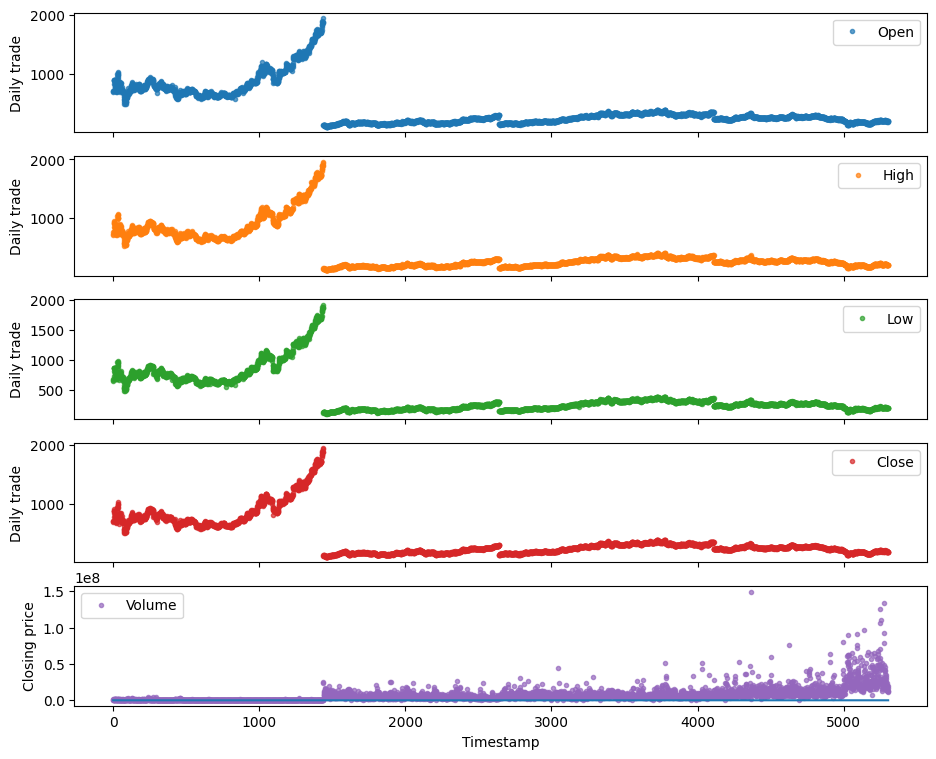

In [489]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [490]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

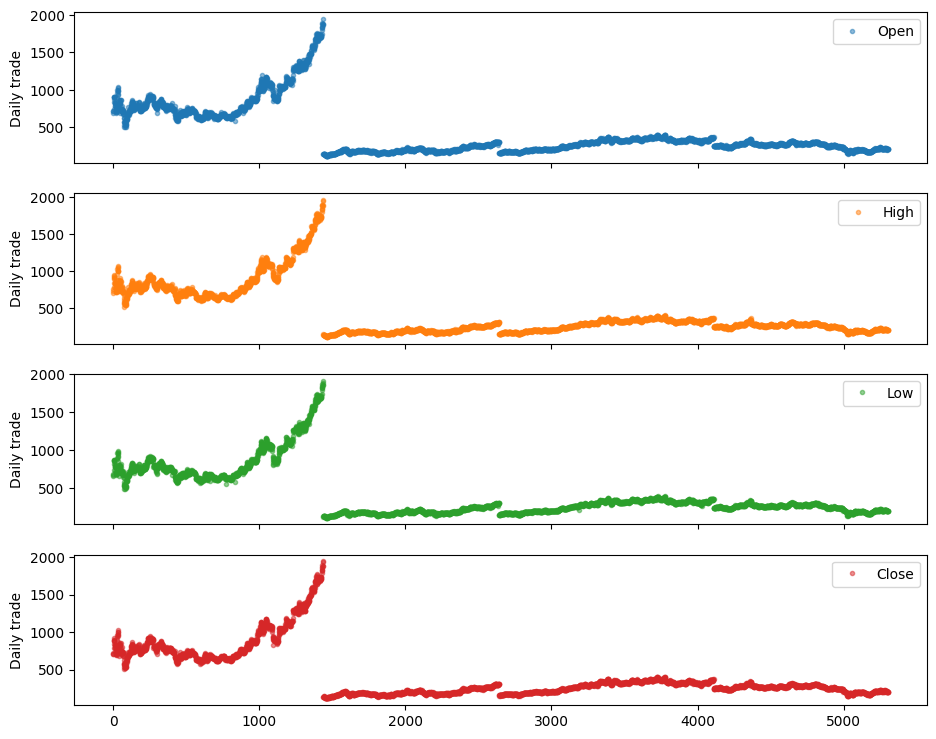

In [491]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

     Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0       ITC     EQ      656.00  694.00  708.50  675.00  708.50  708.50   
1       ITC     EQ      708.50  714.00  729.00  694.30  710.65  712.35   
2       ITC     EQ      712.35  716.25  758.90  660.00  731.00  726.20   
3       ITC     EQ      726.20  741.00  784.30  741.00  784.30  784.30   
4       ITC     EQ      784.30  832.40  847.05  824.00  847.05  847.05   
...     ...    ...         ...     ...     ...     ...     ...     ...   
5301    ITC     EQ      205.35  205.80  206.75  204.70  205.50  205.30   
5302    ITC     EQ      205.30  205.30  206.95  205.05  205.50  205.40   
5303    ITC     EQ      205.40  206.00  206.50  205.30  205.65  205.50   
5304    ITC     EQ      205.50  207.10  207.55  204.05  204.40  204.30   
5305    ITC     EQ      204.30  203.90  205.70  202.00  202.40  202.60   

        VWAP    Volume      Turnover    Trades  Deliverable Volume  \
0     701.81    562715  3.949174e+13     

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,4.203591e+02,3.281677e+02,1.154500e+02,2.016500e+02,2.800500e+02,6.318750e+02,1.940100e+03
Open,5306.0,4.206315e+02,3.282401e+02,1.150000e+02,2.020000e+02,2.802000e+02,6.309750e+02,1.946000e+03
High,5306.0,4.266291e+02,3.333330e+02,1.162000e+02,2.045000e+02,2.830000e+02,6.400000e+02,1.964800e+03
Low,5306.0,4.142415e+02,3.233334e+02,1.144000e+02,1.985000e+02,2.770250e+02,6.235000e+02,1.916300e+03
Last,5306.0,4.202502e+02,3.281079e+02,1.155000e+02,2.015000e+02,2.799000e+02,6.311500e+02,1.940000e+03
Close,5306.0,4.202737e+02,3.281654e+02,1.154500e+02,2.016500e+02,2.800250e+02,6.313625e+02,1.940100e+03
VWAP,5306.0,4.205229e+02,3.284358e+02,1.153900e+02,2.017050e+02,2.800550e+02,6.317275e+02,1.933790e+03
Volume,5306.0,7.173165e+06,9.613497e+06,6.797000e+03,1.038020e+06,5.122630e+06,8.788539e+06,1.494797e+08
Turnover,5306.0,1.799399e+14,2.155242e+14,5.340132e+11,5.423007e+13,1.222452e+14,2.315038e+14,4.254992e+15
Trades,2456.0,9.456376e+04,5.957172e+04,1.425000e+03,5.646525e+04,8.049450e+04,1.132280e+05,6.679650e+05


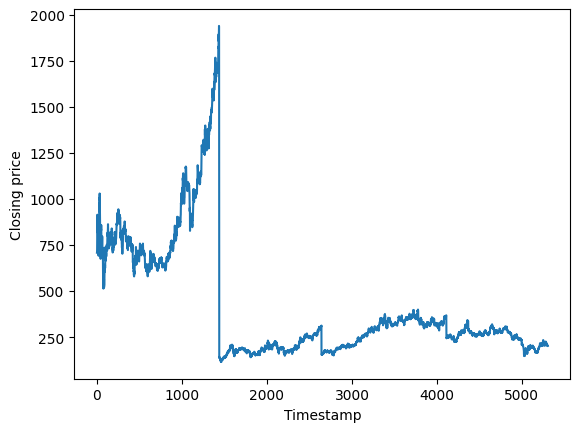

In [492]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [493]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [494]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 13ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0741 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0506
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0321 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0312
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0249 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0329
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0237 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0287
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0227 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0262
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0222 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0251
Epoch 7/100
66/66 [==

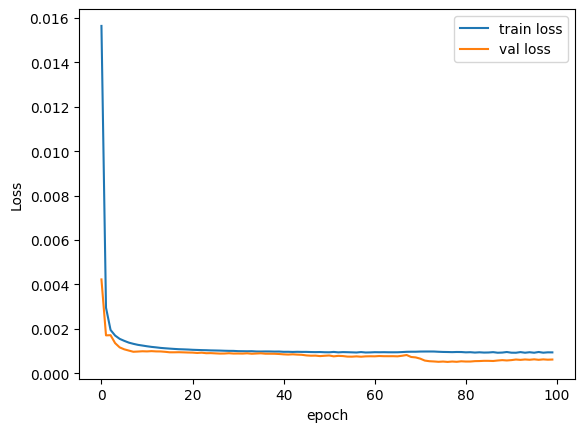

In [495]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

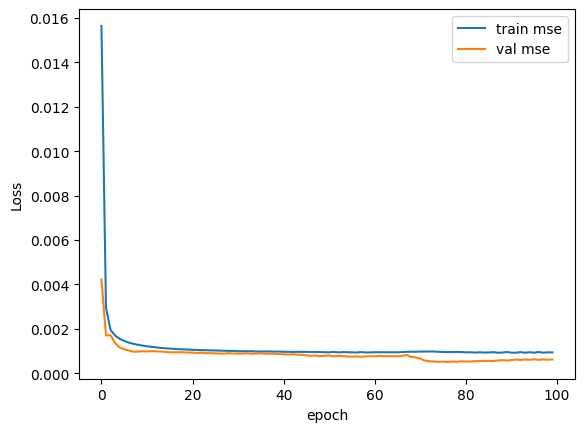

In [496]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

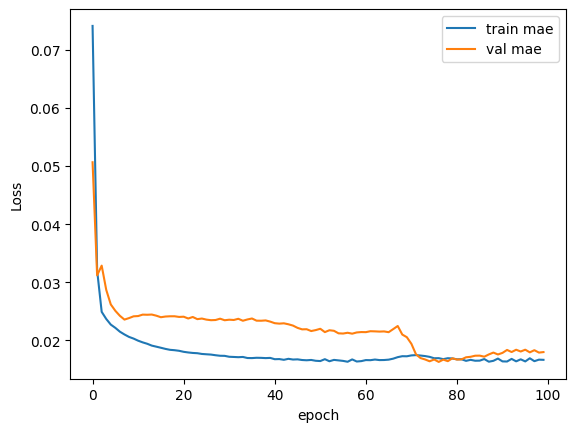

In [497]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_37 (LSTM)              (None, 32)                6272      
                                                                 
 dense_90 (Dense)            (None, 64)                2112      
                                                                 
 dense_91 (Dense)            (None, 64)                4160      
                                                                 
 activation_54 (Activation)  (None, 64)                0         
                                                                 
 dense_92 (Dense)            (None, 64)                4160      
                                                                 
 activation_55 (Activation)  (None, 64)              

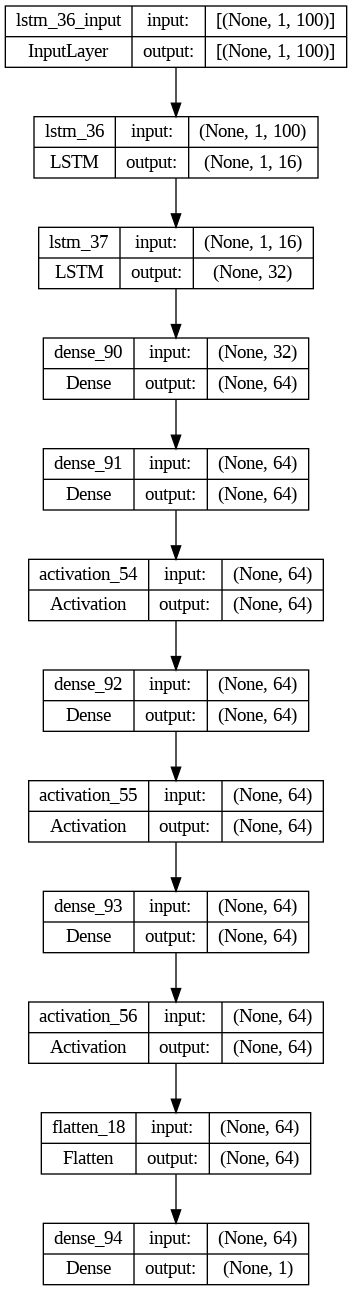

In [498]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [499]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 6.1962e-04 - mse: 6.1962e-04 - mae: 0.0180


[0.0006196181057021022, 0.0006196181057021022, 0.018002556636929512]

In [500]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.987224
R2 Score: 0.984111
Max Error: 0.127921


33/33 [==============================] - 0s 1ms/step


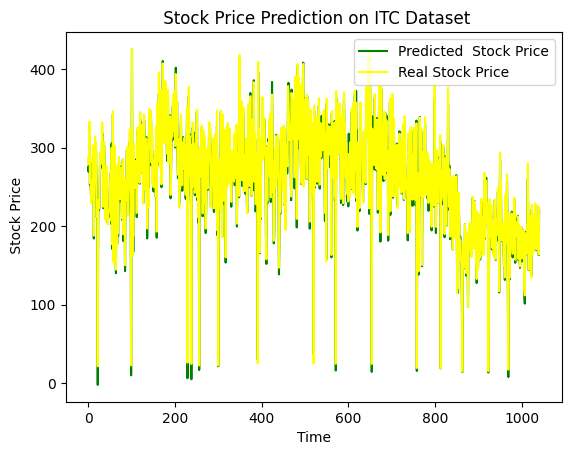

In [501]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on ITC Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

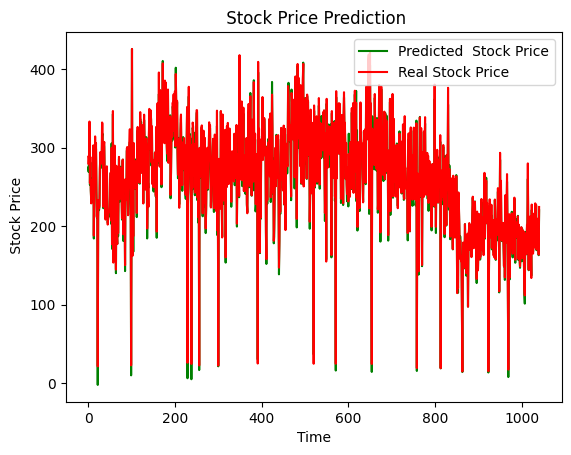

In [502]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [503]:
predicted

array([[274.75223],
       [269.23007],
       [290.67496],
       ...,
       [184.20515],
       [162.94705],
       [220.26318]], dtype=float32)

In [504]:
test_label

array([[288.48800329],
       [278.99559595],
       [286.26875188],
       ...,
       [187.41359089],
       [163.78850615],
       [224.41711021]])

In [505]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0       288.488003       274.752228
1       278.995596       269.230072
2       286.268752       290.674957
3       333.427179       319.996338
4       255.219764       252.656250
...            ...              ...
1036    183.332904       183.823334
1037    202.104036       198.546494
1038    187.413591       184.205154
1039    163.788506       162.947052
1040    224.417110       220.263184

[1041 rows x 2 columns]


In [506]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+---------------------+
|      |    Actual Price    |   Predicted Price   |
+------+--------------------+---------------------+
|  0   | 288.4880032867707  |  274.7522277832031  |
|  1   | 278.99559594547355 |  269.2300720214844  |
|  2   | 286.26875187969927 |  290.6749572753906  |
|  3   | 333.4271790808241  |  319.996337890625   |
|  4   | 255.21976443550702 |      252.65625      |
|  5   | 288.2266217354676  |  281.4048767089844  |
|  6   | 247.16080762250456 | 245.58335876464844  |
|  7   | 229.0192888169035  | 232.67861938476562  |
|  8   | 258.69621871599566 | 260.63922119140625  |
|  9   | 242.85808812081584 |  243.2895965576172  |
|  10  | 236.63434813753582 | 230.45909118652344  |
|  11  | 235.08961228968548 | 236.32911682128906  |
|  12  | 303.1037740217643  | 286.33819580078125  |
|  13  | 187.98531571218797 |  184.224853515625   |
|  14  | 255.99864822382898 | 252.30923461914062  |
|  15  | 271.58386499279686 |  273.1319274902344  |
|  16  | 314

In [507]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_37 (LSTM)              (None, 32)                6272      
                                                                 
 dense_90 (Dense)            (None, 64)                2112      
                                                                 
 dense_91 (Dense)            (None, 64)                4160      
                                                                 
 activation_54 (Activation)  (None, 64)                0         
                                                                 
 dense_92 (Dense)            (None, 64)                4160      
                                                                 
 activation_55 (Activation)  (None, 64)              

In [508]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))